# Решение СНУ

In [1]:
import numpy as np# Решение СНУ
import matplotlib.pyplot as plt
from math import *

## Решение уравнения

### Входные данные

<div>
<img src="equation.png" width="175"/>
</div>

Построим график для нахождения области локализации:

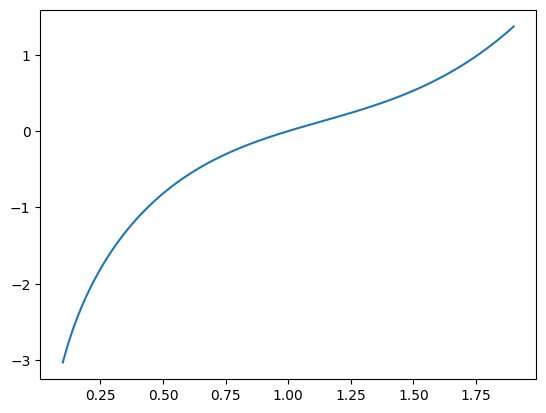

In [2]:
f = lambda x: np.log(x) + (x-1)**3

t = np.linspace(0.1, 1.9, 100)
plt.plot(t, f(t))

Выберем область локализации: $x \in G = [0.5, 1.5]$

### МПИ

Построим следующий итерационный процесс:

$$x_{k+1} = \varphi(x) = e^{-(x_k-1)^3}$$

На области локализации МПИ должен сходится:

$$|\varphi'(x)| = |-3 \cdot e^{-(x - 1)^3} (x - 1)^2| \le 1, x \in G$$

Высокую скорость сходимости можно наблюдать на графике:

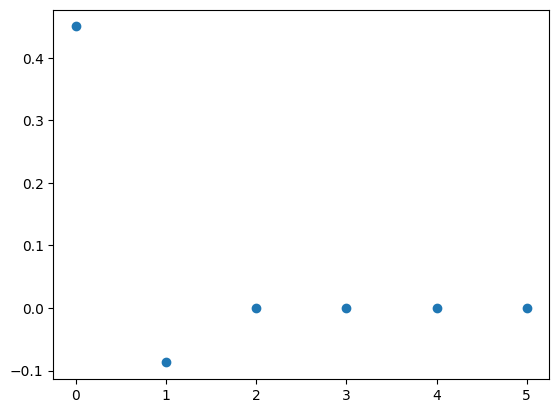

In [3]:
ip = lambda x: np.exp(-(x-1)**3)

x = np.zeros(6)
x[0] = 1.45 # Принадлежит G
for i in range(len(x) - 1):
    x[i + 1] = ip(x[i])

plt.scatter(range(len(x)), x - 1)

assert x[-1] == 1 # Верный ответ. Ура!

### Метод Ньютона

Строим итерационный процесс

$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} = x_k - \frac{\ln x_k + (x_k-1)^3}{\frac{1}{x_k} + 3(x_k-1)^2},$$

сходимость которого проверять, разумеется, мы не будем.

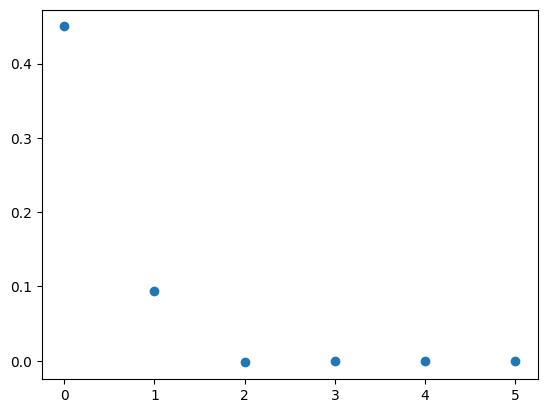

In [4]:
ip = lambda x: x - (np.log(x) + (x-1)**3)/(1/x + 3*(x-1)**2)

x = np.zeros(6)
x[0] = 1.45 # Принадлежит G
for i in range(len(x) - 1):
    x[i + 1] = ip(x[i])

plt.scatter(range(len(x)), x - 1)

assert x[-1] == 1 # Верный ответ. Ура!

## Решение систем

### Входные данные

<div>
<img src="system.png" width="250"/>
</div>

Построим графики для нахождения области локализации:

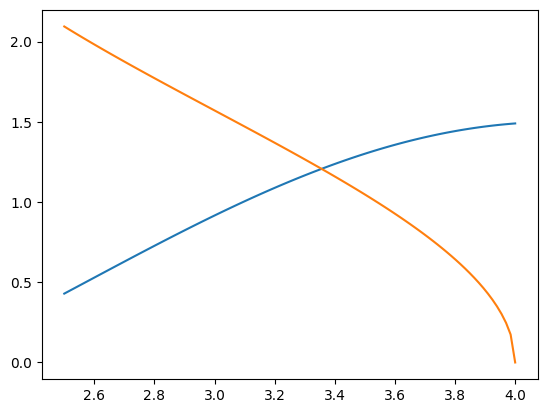

In [5]:
t = np.linspace(2.5, 4, 100)

plt.plot(t, - np.cos(t - 1) + 0.5)
plt.plot(t, + np.arccos(t - 3))

Выберем область локализации: $x \in G = [3, 3.5] \times [1, 1.5]$

### МПИ

Построим следующий итерационный процесс:

$$x_{k+1} = \cos{y_k} + 3$$
$$y_{k+1} = 0.5 - \cos{x_k - 1}$$

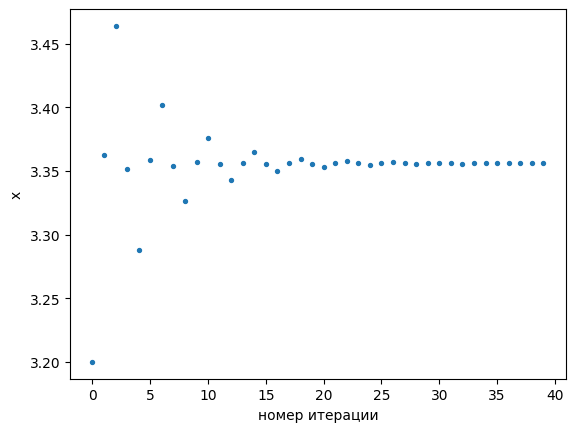

точка [x, y] = [3.35590927 1.20694962]


In [6]:
ip = lambda x: [
    np.cos(x[1]) + 3, 
    0.5 - np.cos(x[0]-1)
]

x = np.zeros((40, 2))
x[0] = [3.2, 1.2] # Принадлежит G
for i in range(len(x) - 1):
    x[i + 1] = ip(x[i])

plt.scatter(range(len(x)), np.take(x, [0], axis=1), s=8)
plt.xlabel('номер итерации')
plt.ylabel('x')
plt.show()

print('точка [x, y] = {}'.format(x[-1]))

### Метод Ньютона

Построим следующий итерационный процесс:

$$\vec{x}_{k+1} = \vec{x}_k - J^{-1} \vec{f}(\vec{x}_k),$$

где

$$
J = \begin{bmatrix}
        -\sin{(x_k - 1)} & 1 \\
        1 & \sin{y_k} \\
    \end{bmatrix}
$$



$$
J^{-1} = \frac{1}{-\sin{(x_k - 1)}\sin{y_k} - 1} \begin{bmatrix}
        \sin{y_k} & -1 \\
        -1 & -\sin{(x_k - 1)} \\
    \end{bmatrix}
$$

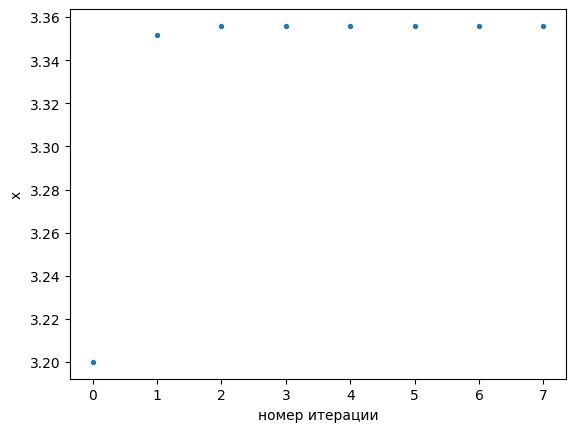

точка [x, y] = [3.35591174 1.20690682]


In [7]:
f = lambda x: [
    np.cos(x[0]-1) + x[1] - 0.5,
    x[0] - np.cos(x[1]) - 3, 
]

Jinv = lambda x: 1/(-np.sin(x[0] - 1) * np.sin(x[1]) -1) * np.array([[np.sin(x[1]),      -1               ],
                                                                     [-1,                -np.sin(x[0] - 1)]])

J = lambda x: np.array([[-np.sin(x[0] - 1), 1           ],
                        [1,                 np.sin(x[1])]])

# ip = lambda x: x - np.matmul(np.linalg.inv(J(x)), f(x))
ip = lambda x: x - np.matmul(Jinv(x), f(x))

x = np.zeros((8, 2))
x[0] = [3.2, 1.2] # Принадлежит G
for i in range(len(x) - 1):
    x[i + 1] = ip(x[i])

plt.scatter(range(len(x)), np.take(x, [0], axis=1), s=8)
plt.xlabel('номер итерации')
plt.ylabel('x')
plt.show()

print('точка [x, y] = {}'.format(x[-1]))

*Метод Ньютона* показал намного более высокую скорость сходимости.